# 1. Introduction

Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not.

In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built!

Read datset from kaggle

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import opendatasets as od

Mount google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copy credencials of kaggle to correct place

In [4]:
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ./
!chmod 600 ~/.kaggle/kaggle.json
print("ok")

ok


create folder of kaggle with url of dataset

In [5]:
od.download(
    "https://www.kaggle.com/datasets/rtatman/lego-database")

Skipping, found downloaded files in "./lego-database" (use force=True to force download)


# Import Libraries

In [6]:
# for performing mathematical operations
import numpy as np

# for data processing, CSV file I/O
import pandas as pd

# visualizing inventory_parts that has most colors using matplotlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading Data

A comprehensive database of lego blocks is provided by Rebrickable. The data is available as csv files and the schema is shown below.

https://rebrickable.com/downloads/

Let us start by reading in the colors data to get a sense of the diversity of Lego sets!

In [7]:
# Import pandas
import pandas as pd

# Read data (cvs file)

file1 =('/content/lego-database/inventories.csv')
file2 =('/content/lego-database/inventory_parts.csv')
file3 =('/content/lego-database/inventory_sets.csv')
file4 =('/content/lego-database/part_categories.csv')
file5 =('/content/lego-database/parts.csv')
file6 =('/content/lego-database/sets.csv')
file7 =('/content/lego-database/colors.csv')
file8 =('/content/lego-database/themes.csv')



inventories = pd.read_csv(file1, index_col=0)
inventory_parts = pd.read_csv(file2, index_col=0)
inventory_sets = pd.read_csv(file3, index_col=0)
part_categories = pd.read_csv(file4, index_col=0)
parts = pd.read_csv(file5, index_col=0)
sets = pd.read_csv(file6, index_col=0)
colors = pd.read_csv(file7, index_col=0)
themes = pd.read_csv(file8, index_col=0)

# displaying the contents of the csv file
# display(colors)

# Print the first few rows
print(colors.head())

              name     rgb is_trans
id                                 
-1         Unknown  0033B2        f
 0           Black  05131D        f
 1            Blue  0055BF        f
 2           Green  237841        f
 3  Dark Turquoise  008F9B        f


According to the above database diagram following are the relationships mapping:
- Id (Colors) -> Color_Id (Inventory_Parts)
- Id (Inventories) -> Inventory_Id (Inventory_Parts)
- Part_Num (Parts) -> Part_Num (Inventory_Parts)
- Id (Part_Categories) -> Part_Cat_Id (Parts)

In [9]:
colors_rows = colors.shape[0] # nr rows
colors_column = colors.shape[1] # nr columns

colors.shape, colors_rows,colors_column

((135, 3), 135, 3)

# 3. Exploring Colors
Now that we have read the colors data, we can start exploring it! Let us start by understanding the number of colors available.

In [10]:
#check the info of colors dataset
colors.info()

#check the shape of dataframe colors
colors.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, -1 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      135 non-null    object
 1   rgb       135 non-null    object
 2   is_trans  135 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


(135, 3)

We have 135 rows and 3 columns. Every color has respective name, rgb and transparency factor.

In [11]:
# How many distinct colors are available?
num_colors=colors.rgb.unique()
len(num_colors)

124

We have 124 different colors at column rgb.

In [12]:
# Print num_colors unique
print(colors['rgb'].nunique()) #
print(len(num_colors)) #nr of rows

124
124


In [13]:
# How many colors are available?
num_colors=colors.rgb.size
num_colors=colors.shape[0]

# Print num_colors
print(num_colors)

135


We have 124 unique colors in 135 redors of colors.

#4. Transparent Colors in Lego Sets
The colors data has a column named is_trans that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.

In [14]:
# nr of color transparent and non transparents?
print(colors['is_trans'].value_counts())

f    107
t     28
Name: is_trans, dtype: int64


We have 28 color transparent and 107 non transparents.

In [15]:
# colors_summary: Distribution of colors based on transparency
# Summarize colors based on their transparency
colors_summary = colors.groupby('is_trans').count()

#Print out colors_summary
print(colors_summary)

          name  rgb
is_trans           
f          107  107
t           28   28


## Visualize transparent vs non transparent colors

([<matplotlib.patches.Wedge at 0x7bfb60eec880>,
 [Text(0.8746328916431827, 0.6670961736180809, 'transparent'),
  Text(-0.8746329228722073, -0.6670961326735597, 'non transparent')],
 [Text(0.5565845674092981, 0.42451574684786963, '20.74%'),
  Text(-0.5565845872823136, -0.42451572079226524, '79.26%')])

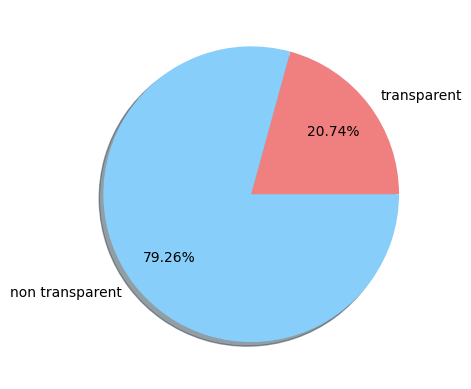

In [16]:
transparent = (colors[colors['is_trans'] == 't'])
non_transparent = (colors[colors['is_trans'] == 'f'])

#check number of record in groups
len(transparent), len(non_transparent)

labels = 'transparent', 'non transparent'
sizes = [len(transparent), len(non_transparent)]
colors1 = ['lightcoral', 'lightskyblue']
# explode 1st slice
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors1, autopct='%1.2f%%',
       shadow= True, pctdistance = 0.7)




# 5. Investigating Parts and part categories

## How many parts does the db have?

In [17]:
# checking first 5 rows for parts csv file
parts.head(5)

,name,part_cat_id
part_num,,
0687b1,Set 0687 Activity Booklet 1,17
0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
0903,Baseplate 16 x 24 with Set 080 Red House Print,1
0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


Verify info of db, and shape

In [18]:
parts.info(), parts.shape

<class 'pandas.core.frame.DataFrame'>
Index: 25993 entries, 0687b1 to zbb022
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         25993 non-null  object
 1   part_cat_id  25993 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 609.2+ KB


(None, (25993, 2))

We have 25993 records in parts.

In [19]:
part_categories.head(), part_categories.shape

(                       name
 id                         
 1                Baseplates
 2            Bricks Printed
 3             Bricks Sloped
 4   Duplo, Quatro and Primo
 5            Bricks Special,
 (57, 1))

We have 57 records of part categories

## How many parts each part_category contains?

In [20]:
# create a dataframe with part_categories and thier parts (use the merge)
parts_with_categories = pd.merge(left=part_categories, right=parts, left_on='id', right_on='part_cat_id')

#rename column names
parts_with_categories = parts_with_categories.rename(columns={'name_x': 'Part_Category_Name', 'name_y':'Part_Name'})

# visualize to check
parts_with_categories.head(5)

,Part_Category_Name,Part_Name,part_cat_id
0,Baseplates,Baseplate 16 x 30 with Set 080 Yellow House Print,1
1,Baseplates,Baseplate 16 x 24 with Set 080 Small White Hou...,1
2,Baseplates,Baseplate 16 x 24 with Set 080 Red House Print,1
3,Baseplates,Baseplate 16 x 24 with Set 080 Large White Hou...,1
4,Baseplates,Baseplate 24 x 32,1


## Grouping categories and counting their respective number of parts

In [21]:
parts_with_categories['Part_Category_Name'].nunique() #57 unique part category name

parts_with_categories_group = parts_with_categories['Part_Category_Name'].value_counts()
len(parts_with_categories_group) # check if also get the unique part category name

# order ascendenting
parts_order= parts_with_categories_group.sort_values(ascending=False)
parts_order[0:10]
# print first 5
parts_with_categories_group.head(n=10), parts_order[0:10]

(Minifigs                                    8556
 Minifig Accessories                         2071
 Non-LEGO                                    1964
 Duplo, Quatro and Primo                     1552
 Tiles Printed                               1191
 Other                                       1125
 Bionicle, Hero Factory and Constraction     1116
 Bricks Printed                               744
 Plants and Animals                           742
 Power Functions, Mindstorms and Electric     462
 Name: Part_Category_Name, dtype: int64,
 Minifigs                                    8556
 Minifig Accessories                         2071
 Non-LEGO                                    1964
 Duplo, Quatro and Primo                     1552
 Tiles Printed                               1191
 Other                                       1125
 Bionicle, Hero Factory and Constraction     1116
 Bricks Printed                               744
 Plants and Animals                           742
 Power Fu

## Visualize the number of parts every part-category contains

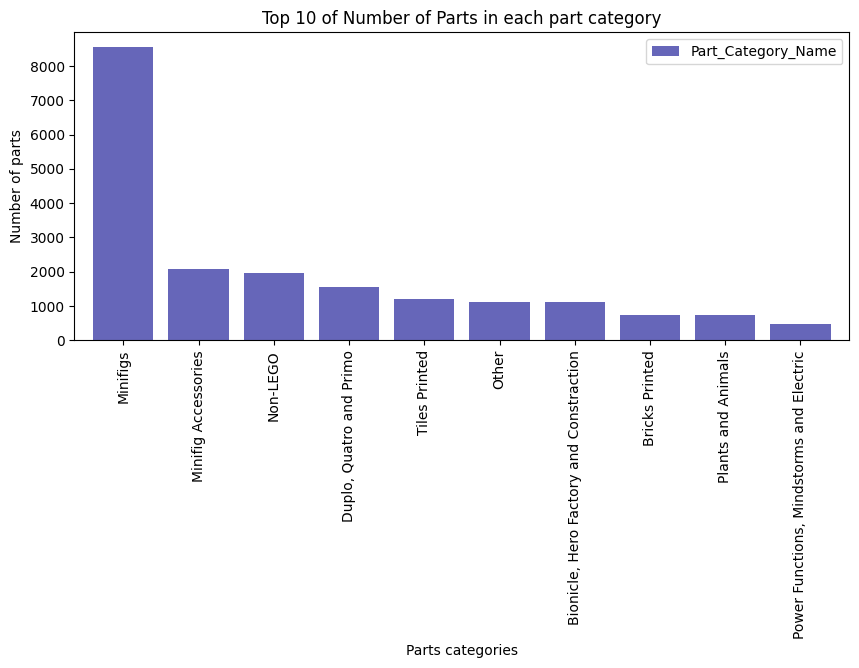

In [22]:
top_10 = parts_order[0:10]
matplotlib.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(figsize=(10,4))
top_10.plot(kind='bar', color='darkblue', alpha=0.6, width=0.8)
plt.xlabel('Parts categories')
plt.ylabel('Number of parts')
plt.title('Top 10 of Number of Parts in each part category')
plt.xticks(rotation=90)
plt.legend()
plt.show()



**"Minifigs"** is the most used category and contains more 8.5K Parts.

# 6. Investigating Inventories

## How many inventory parts are there in the database?

In [23]:
# checking first twenty rows for inventories csv file
inventories.tail(), inventories.shape

(       version   set_num
 id                      
 18593        1   31066-1
 18645        1   71018-7
 18701        1  71018-17
 18704        1   60159-1
 18708        1   75090-2,
 (11681, 2))

There are **11681** total inventory parts in our database. Every inventory is associated with its set_num.

## grouping each version and counting the frequency of sets in each group of inventory

In [24]:
sets_per_inventory_parts = inventories['version'].value_counts()
sets_per_inventory_parts.sort_values(ascending=False)

1    11669
2        9
3        1
4        1
5        1
Name: version, dtype: int64

In [25]:
inventories.groupby('version').count()

,set_num
version,
1,11669
2,9
3,1
4,1
5,1


We have **5** inventory types, out of which version 1 has the most sets that is 11669.

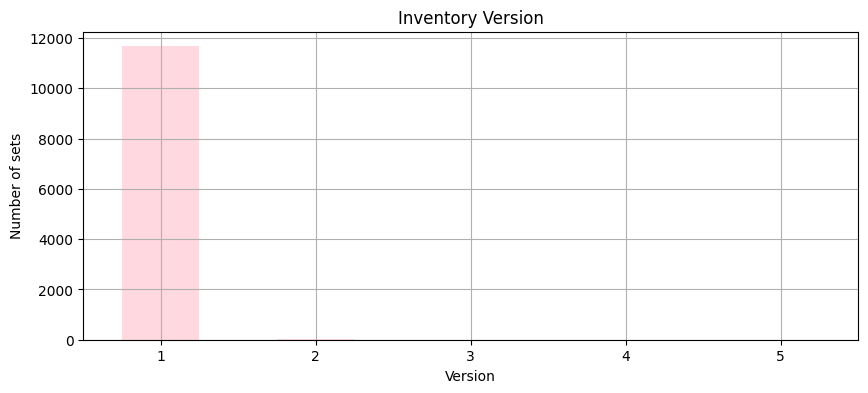

In [26]:
fig, axs= plt.subplots(figsize=(10, 4))
sets_per_inventory_parts.plot(kind='bar', color= 'pink', alpha=0.6, width= 0.5)
plt.xlabel('Version')
plt.ylabel('Number of sets')
plt.title('Inventory Version')
plt.xticks(rotation=0)
plt.grid()
plt.show()



## Which inventory parts have the most colors availability?

In [27]:
inventory_parts.head()

,part_num,color_id,quantity,is_spare
inventory_id,,,,
1,48379c01,72,1,f
1,48395,7,1,f
1,mcsport6,25,1,f
1,paddle,0,1,f
3,11816pr0005,78,1,f


In [28]:
#select column color_id
inventory_part_color=inventory_parts[['color_id']]
inventory_part_color

#unique colors at inventory_parts
inventory_id_color_unique = inventory_part_color.groupby('inventory_id').count()


# #sort ascending
inventory_order_asc= inventory_id_color_unique.sort_values(by='color_id', ascending=False)
inventory_order_asc
# #top 10
inventory_parts_top10_colors  = inventory_order_asc[0:10]
inventory_parts_top10_colors

,color_id
inventory_id,
1305,769
12397,700
8461,687
16139,593
14208,592
7869,591
12656,578
12798,554
8438,519


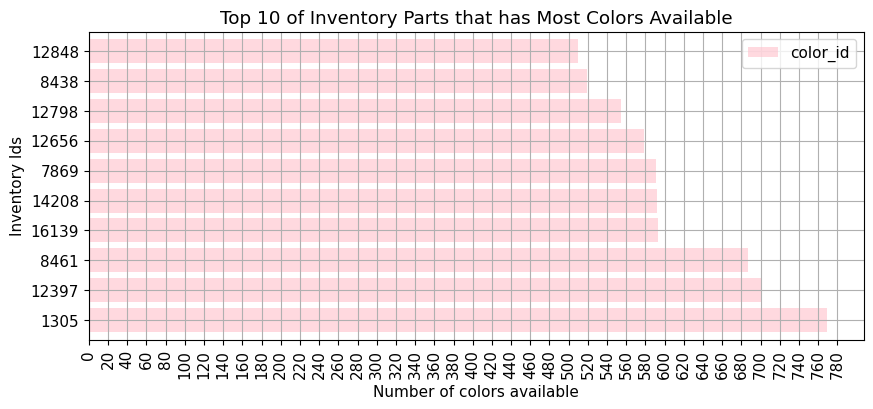

In [29]:
matplotlib.rcParams.update({'font.size': 11})

fig, axs = plt.subplots(figsize=(10,4))
inventory_parts_top10_colors['color_id']. plot(kind='barh', color='pink', alpha=0.6, width=0.8)
plt.xlabel('Number of colors available')
plt.ylabel('Inventory Ids')
plt.title('Top 10 of Inventory Parts that has Most Colors Available')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
axs.set_xticks(np.arange(0,800,20)) # to set the range of axis x

plt.show()


Text(0.5, 1.0, 'Number of colors available per Inventory Part')

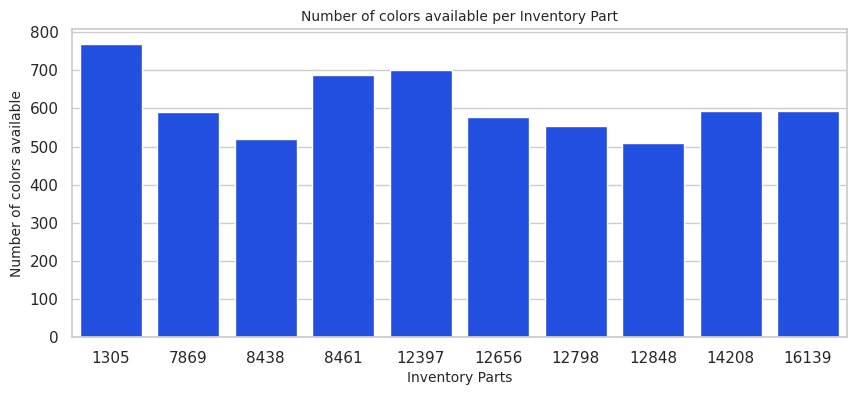

In [30]:
# with seaborn library
sns.set(style='whitegrid')

#initialize the matplotlib figure
fig, axs= plt.subplots(figsize=(10, 4))

#plot
sns.set_color_codes('bright')
sns.barplot(x = inventory_parts_top10_colors.index, y = 'color_id', data = inventory_parts_top10_colors, color='b')

#customize Bar graph
plt.xlabel('Inventory Parts', fontsize=10)
plt.ylabel('Number of colors available', fontsize=10)
plt.title('Number of colors available per Inventory Part', fontsize=10)


Inventory_ID **1305** has the most available colors.

# 7. Explore Lego Sets
Another interesting dataset available in this database is the sets data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.

Let us use this data to explore how the average number of parts in Lego sets has varied over the years.

In [31]:
# Read sets data as `sets`
sets =  pd.read_csv('/content/lego-database/sets.csv')

In [32]:
parts_by_year = (round(sets.groupby('year').mean(),2))
parts_by_year.head()

<ipython-input-32-b5265a19021e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parts_by_year = (round(sets.groupby('year').mean(),2))


,theme_id,num_parts
year,,
1950,370.29,10.14
1953,371.00,16.50
1954,371.14,12.36
1955,375.68,36.86
1956,381.83,18.50


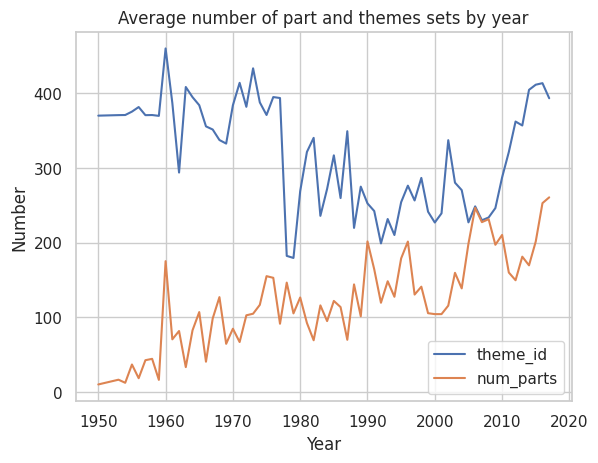

In [33]:
# Plot trends in average number of parts by year
parts_by_year.plot()
plt.title('Average number of part and themes sets by year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

<ipython-input-34-5550ab4e1bc0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(parts_by_year().index, parts_by_year().num_parts)


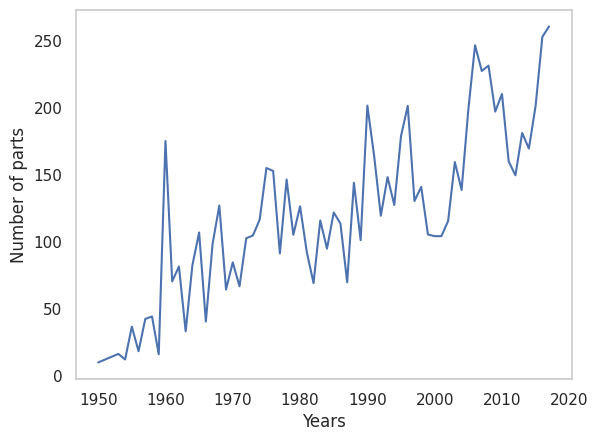

In [34]:
parts_by_year = sets.groupby('year').mean

fig, ax = plt.subplots()
ax.plot(parts_by_year().index, parts_by_year().num_parts)
ax.set(xlabel='Years', ylabel='Number of parts')
ax.grid()
plt.show()

# type(parts_by_year) #method

In [35]:
# Create a summary of average number of parts by year: `parts_by_year`
# subset of sets with only num_parts column average
parts_by_year_num_parts = (round(sets.groupby('year').mean(),2))[['num_parts']]
print(parts_by_year_num_parts.head())



      num_parts
year           
1950      10.14
1953      16.50
1954      12.36
1955      36.86
1956      18.50


<ipython-input-35-d425c64efbed>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parts_by_year_num_parts = (round(sets.groupby('year').mean(),2))[['num_parts']]


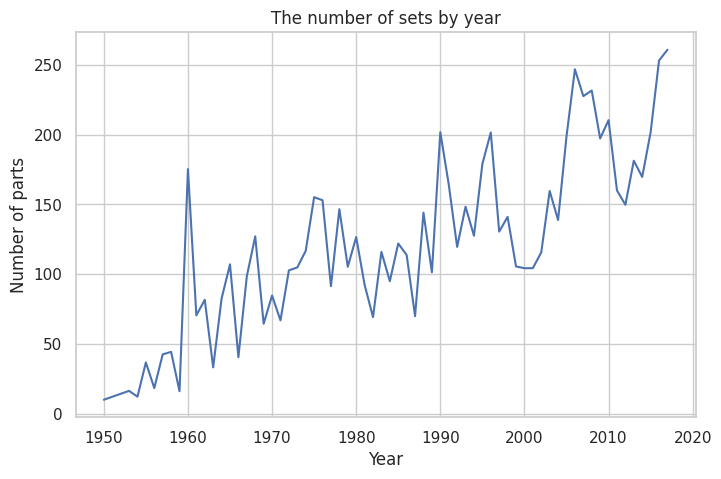

In [36]:
# Plot trends in average number of parts by year
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)
plt.plot(parts_by_year_num_parts)
plt.title('The number of sets by year')
plt.xlabel('Year')
plt.ylabel('Number of parts')
plt.show()


# 8. Lego Themes Over Years
Lego blocks ship under multiple themes. Let us try to get a sense of how the number of themes shipped has varied over the years.

In [37]:
#Create a summary of the number of distinct themes shipped by year.
themes_id_unique = sets.theme_id.unique()
len(themes_id_unique) #585 uniques themes

sets.groupby('year').nunique()[['theme_id']] # count unique theme_id by year
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year').nunique()[['theme_id']]

print(themes_by_year.head(n=5))

      theme_id
year          
1950         2
1953         1
1954         2
1955         4
1956         3


# 9. Wrapping It All Up!
Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the themes_by_year DataFrame you created in the previous step.

In [38]:
# Get the number of unique themes released in 1999
num_themes = themes_by_year.loc[1999,'theme_id']

# Print the number of unique themes released in 1999
print(num_themes)

71
